In [23]:
from figures.plot_nice import MultiModalRegressionTransformerWithWeights
from model.decoder import MultiModalRegressionTransformer
import torch
original_model = MultiModalRegressionTransformer(384, 26, 64, 28, 6, 16, 5, 0)
original_model.load_state_dict(torch.load('val_loss0.1074_DPR_0.1_MP_0.3_DM_64_TL_5_heads_16.pth'))

FP_model = MultiModalRegressionTransformer(384, 26, 64, 28, 6, 16, 5, 0)
FP_model.load_state_dict(torch.load('FP_model.pt'))

#MultiModalRegressionTransformerWithWeights()

<All keys matched successfully>

In [25]:
from figures.plot_nice import create_modified_model_from_original, save_attention_weights, plot_attention_heads_comparison, plot_attention_comparison
modified_model = create_modified_model_from_original(original_model, 'all')
fp_mod = create_modified_model_from_original(FP_model, 'all')
from model.dataset import load_dataset
from model.config import COLUMN_DICT, MAX_SEQUENCE_LENGTH, TOKEN_TYPE_VOCAB
from model.collate import create_collate_fn
from torch.utils.data import DataLoader

data_path = 'data/train_set.csv'

dataset, chemberta_dimension = load_dataset(data_path, COLUMN_DICT, MAX_SEQUENCE_LENGTH)
    
    # Create collate function
configured_collate_fn = create_collate_fn(TOKEN_TYPE_VOCAB, 0)
    
    # Create DataLoader
dataloader = DataLoader(
    dataset, 
    batch_size=1, 
    shuffle=False,  # Usually no shuffling for inference
    collate_fn=configured_collate_fn
)




Data loaded from data/train_set.csv. Shape: (8850, 26)
ChemBERTa loaded successfully with hidden size: 384


dict_keys(['SMILES_fps', 'word_tokens_ref', 'values_ref', 'token_type_ids', 'attention_mask', 'masked_lm_labels', 'token_type_vocab'])
Attention weights saved to attention_weights/
Layers captured: ['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4']
  layer_0 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 16
    - Sequence length: 28 x 28
  layer_1 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 16
    - Sequence length: 28 x 28
  layer_2 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 16
    - Sequence length: 28 x 28
  layer_3 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 16
    - Sequence length: 28 x 28
  layer_4 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 16
    - Sequence length: 28 x 28
Attention weights saved to attention_weights/
Layers captured: ['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4']
  layer_0 shape: (1, 16, 28, 28)
    - Batch size: 1
    - Number of heads: 1

c:\Users\gkg124\AppData\Local\miniconda3\envs\marketing_masters\lib\site-packages\torch\nn\functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


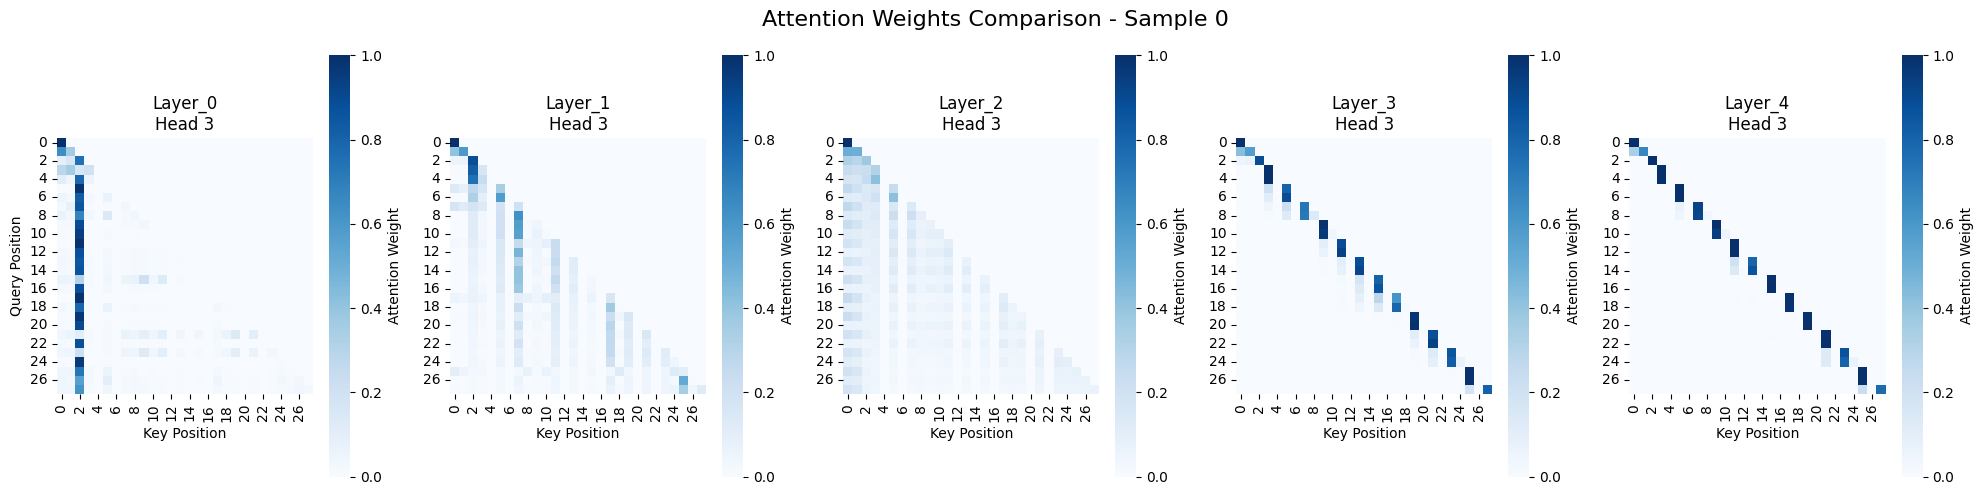

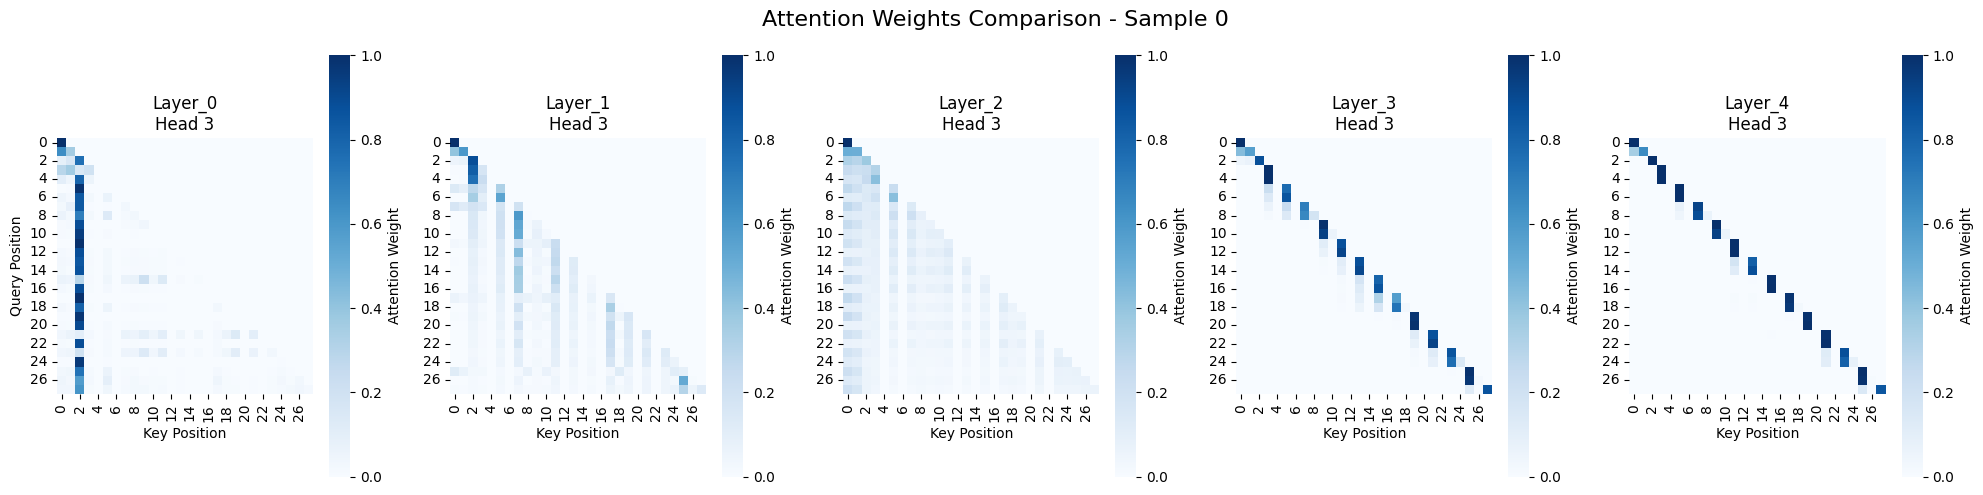

In [51]:
#carboxylic_acid,CC(=O)O,beta,0.048067142014144595,SA,2.5950361151050414,fn,-0.896042866699664,ET30,1.3790523498227498,pi_star,0.19054598691392477,delta,-0.3757147872390322,N_mol_cm3,1.5719328599406628,n,-1.0855363021119804,SdP,0.4884623095368899,SP,-0.8755939101280419,alpha,2.0072339636690737,SB,-0.09128940826057937


for index, batch in enumerate(dataloader):
    if index == 10:
        sample_input = batch
sample_input['token_type_vocab'] = TOKEN_TYPE_VOCAB
print(sample_input.keys())

attention_weights = save_attention_weights(modified_model, sample_input)
fp_weight = save_attention_weights(fp_mod, sample_input)
head = 3
plot_attention_comparison(attention_weights, layers_to_compare=['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4'], head_idx=head)
plot_attention_comparison(fp_weight, layers_to_compare=['layer_0', 'layer_1', 'layer_2', 'layer_3', 'layer_4'], head_idx=head)

In [56]:
import pandas as pd

path = 'data/full_extracted_table.csv'

df = pd.read_csv(path)

for i in df.columns.to_list():
    print(i, sum(df[i].isna()))
    print(min(df[i]), max(df[i]))

solvent 0
(trifluoromethyl)benzene -butyrolactone
solvent smiles 0
C(#N)C(Cl)(Cl)Cl c1ccc2c(c1)CCCC2
ET(30) 43
30.9 63.1
α 71
0.0 1.96
β 71
0.0 1.43
π* 77
-0.08 1.09
SA 30
0.0 1.062
SB 30
0.014 1.0
SP 30
0.339 1.0
SdP 30
0.0 1.454
N (mol/cm3) 0
0.0034 0.05541
n 36
1.275 1.627
f(n) 36
0.023974 0.35444
δ 84
13.9 47.9
